# Multi-Class

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

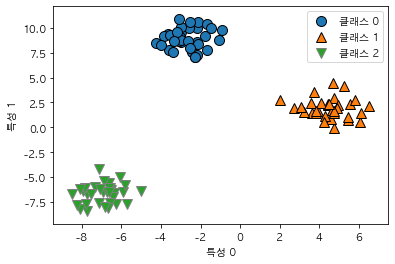

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [3]:
logr = LogisticRegression(solver ="lbfgs",multi_class="auto").fit(X,y)
print("계수 배열의 크기: ",logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


- solver : lbfgs , multi_class : auto로 설정 해주어야함

# 각각 multi_class 에 auto,multinomial,ovr 로 설정 하였을때

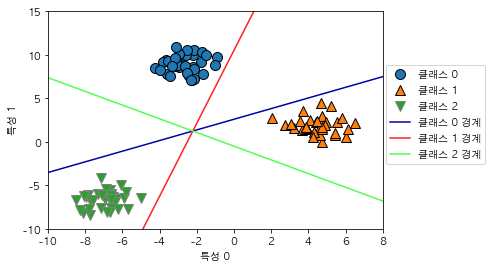

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept,color in zip(logr.coef_, logr.intercept_,   mglearn.cm3.colors):
    plt.plot(line, -(line *coef[0] + intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc=(1.01,0.3))

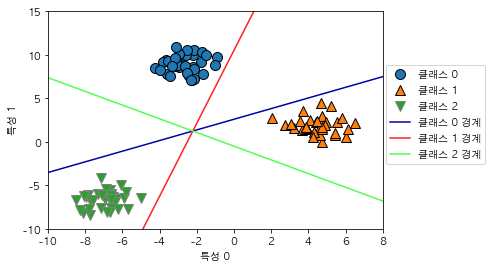

In [5]:
logr = LogisticRegression(solver ="lbfgs",multi_class="multinomial").fit(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept,color in zip(logr.coef_, logr.intercept_,   mglearn.cm3.colors):
    plt.plot(line, -(line *coef[0] + intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc=(1.01,0.3))

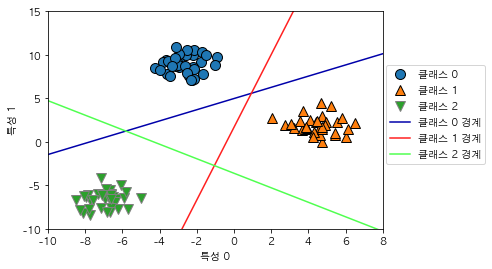

In [6]:
logr = LogisticRegression(solver ="lbfgs",multi_class="ovr").fit(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept,color in zip(logr.coef_, logr.intercept_,   mglearn.cm3.colors):
    plt.plot(line, -(line *coef[0] + intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc=(1.01,0.3))

- multinomial , ovr의 결정경계면의 차이를 볼수 있음


# ovr의 경계면 출력

계수 배열:
 [[-0.68329705  1.06169509]
 [ 1.36537961 -0.32670774]
 [-0.61161973 -0.73287599]]


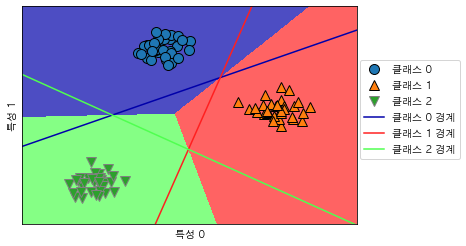

In [7]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line,-(line * coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

print("계수 배열:\n",logr.coef_)

# multinomial의 경계면 출력

계수 배열:
 [[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


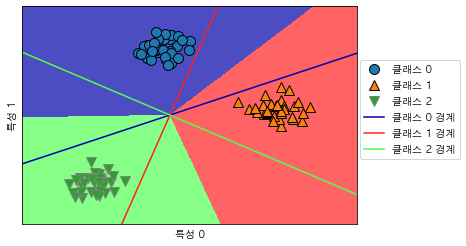

In [8]:
logr = LogisticRegression(solver ="lbfgs",multi_class="multinomial").fit(X,y)
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line,-(line * coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("계수 배열:\n",logr.coef_)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.4)
logr = LogisticRegression(solver ="lbfgs",multi_class="auto").fit(X,y)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print("\n테스트 세트의 정확도ㅓ: {:.2f}".format(logr.score(X_test,y_test)))
print("Numer of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도ㅓ: 0.92
Numer of mislabeled points out of a total %d points : %d (60, 5)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.4)
logr = LogisticRegression(solver ="lbfgs",multi_class="multinomial").fit(X,y)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print("\n테스트 세트의 정확도ㅓ: {:.2f}".format(logr.score(X_test,y_test)))
print("Numer of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도ㅓ: 0.92
Numer of mislabeled points out of a total %d points : %d (60, 5)


# IRIS 분류

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Numer of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

Accuracy:  1.0
Numer of mislabeled points out of a total %d points : %d (38, 0)


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.4)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Numer of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

Accuracy:  0.9333333333333333
Numer of mislabeled points out of a total %d points : %d (60, 4)


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.3)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Numer of mislabeled points out of a total %d points : %d", (X_test.shape[0],(y_test !=y_pred).sum()))

Accuracy:  1.0
Numer of mislabeled points out of a total %d points : %d (45, 0)


In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target,random_state=42)
classifierGN = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

훈련 세트 점수: 0.946
테스트 세트 점수: 0.937


# 결정트리(make_moons)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
tree = DecisionTreeClassifier(random_state =0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.840


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.933
테스트 세트 정확도: 0.800


### cancer data

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))

for max_depth in [1,4,8]:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth={}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

X_train.shape: (426, 30) X_test.shape: (143, 30)
max_depth=1
훈련 세트 정확도: 0.923
테스트 세트 정확도: 0.923
max_depth=4
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951
max_depth=8
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [18]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], feature_names =cancer.feature_names, impurity=False, filled=True)

In [19]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


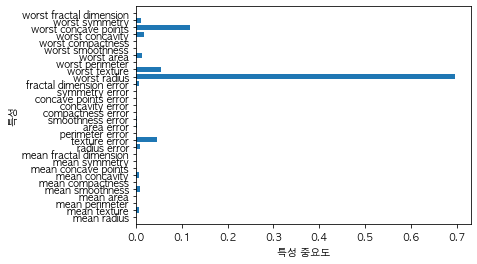

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    

plot_feature_importances_cancer(tree)

- 특성 중요도를 출력

## 특성과 클래스 사이의 관계

Feature importances: [0. 1.]


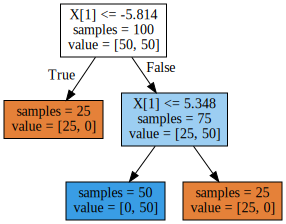

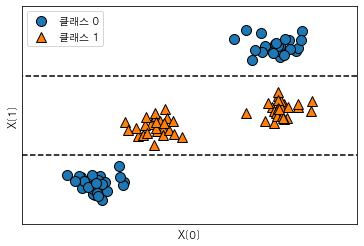

In [21]:
import graphviz
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 결정트리회귀

ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/Mbyte)')

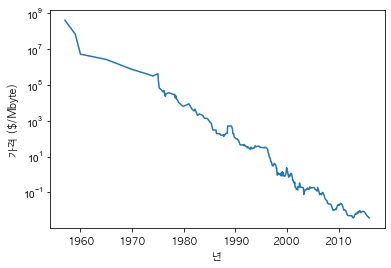

In [23]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 

data_train = ram_prices[ram_prices.date <2000]
data_test = ram_prices[ram_prices.date >=2000]

print("data_train.shape: {}".format(data_train.shape), "data_test.shape:{}".format(data_test.shape))
X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree =DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape: (202, 3) data_test.shape:(131, 3)


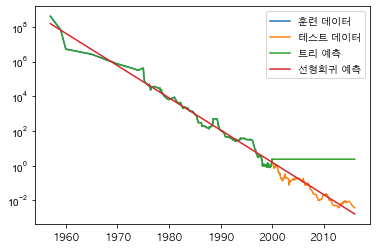

In [30]:
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label ="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label ="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label ="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label ="선형회귀 예측")
plt.legend()

- 훈련 데이터 범위 밖을 예측
- 시계열 데이터에 잘 맞지 않음
- 등락의 예측에는 적용가능

# 붓꽃 Decision Tree Classifier

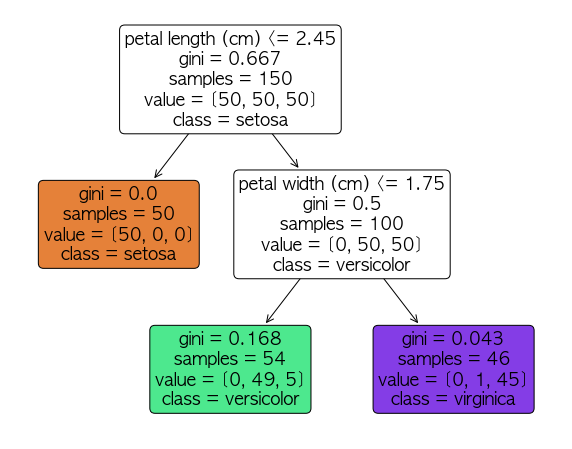

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

iris = load_iris()
X= iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled= True, rounded =True, max_depth=2, feature_names=iris.feature_names[2:],class_names=iris.target_names)
plt.show()

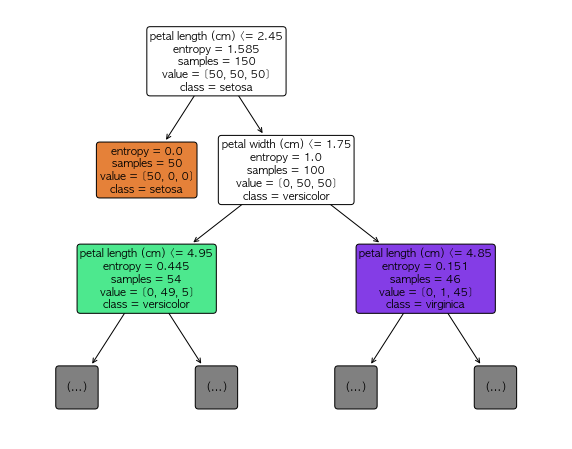

In [36]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
tree_clf.fit(X,y)

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled= True, rounded =True, max_depth=2, feature_names=iris.feature_names[2:],class_names=iris.target_names)
plt.show()

# RandomForestClassifier

- classification : 트리들이 예측한 확률을 평균내러 가장 높은 확률을 가진 클래스가 예측값이됨
- regression : 예측들을 평균화하여 최종예측을 함

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # 트리를 5개 만듬
forest.fit(X_train, y_train)

print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest, X,y,cv=5)
print("테스트 세트 정확도: CV=5 {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X,y,cv=10)
print("테스트 세트 정확도: CV=10 {:.3f}\n".format(cvscores.mean()))


태스트 세트 정확도: 0.920

태스트 세트 정확도: CV=5 0.860

태스트 세트 정확도: CV=10 0.840



In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=42) 
dt.fit(X_train, y_train)

print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test,y_test)))

cvscores = cross_val_score(dt, X,y,cv=5)
print("테스트 세트 정확도: CV=5 {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(dt, X,y,cv=10)
print("테스트 세트 정확도: CV=10 {:.3f}\n".format(cvscores.mean()))



태스트 세트 정확도: 0.880

태스트 세트 정확도: CV=5 0.850

태스트 세트 정확도: CV=10 0.840



In [54]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}\n".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest, X,y,cv=10)
print("테스트 세트 정확도: CV =10{:.3f}\n".format(cvscores.mean()))
print(cvscores)

훈련 세트 정확도: 1.000

테스트 세트 정확도: 0.972

테스트 세트 정확도: CV =100.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


### 4주차 강의 후 코드와 결과에 대한 고찰


- graphviz를 import하는데 계속 오류가 발생하여 네이버,구글등 찾으면서 해결하였고, 다중클래스 multi_class , 결정트리 max_depth, 등등 값들의 변경을 통해서 조금씩 차이를 보면서 이해할려고 노력하였습니다. 또한 이전에 배웠던 내용들도 반복적으로 학습을 해야 내 것이 되겠다라는 생각이 들었습니